In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd

In [2]:
# collaborative based
rating_file = pd.read_csv('./datasets/rating.csv')  

In [3]:
rating_file.head()

,Unnamed: 0,user_id,anime_id,rating
0,2443027,23306,3503,7
1,4751250,45366,1190,-1
2,7694962,72305,5150,8
3,7066179,65975,6045,10
4,7198178,67151,3702,9


In [4]:
# content based
anime_file = pd.read_csv('./datasets/anime.csv')

In [5]:
anime_file.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
# Filter out all drama anime and use it
# def filtering(row):
#    if "Drama" in row[genre]

In [7]:
#anime_file.genre
items = np.array(anime_file.genre)

In [8]:
items

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Hentai', 'Hentai', 'Hentai'], dtype=object)

In [9]:
items[0]

'Drama, Romance, School, Supernatural'

In [10]:
# Filtering out rows which has Drama as genre
vals = [("Drama" in str(item)) for item in items]

In [11]:
anime_file.loc[vals]

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749
...,...,...,...,...,...,...,...
12017,2218,Fujimi 2-choume Koukyougakudan,"Drama, Music, Psychological, Romance, Slice of...",OVA,1,5.72,4981
12071,3396,Gloria: Kindan no Ketsuzoku,"Drama, Hentai, Mystery, Romance",OVA,3,5.61,654
12143,4697,Chimera: Target I Datenshi Kourin,"Drama, Hentai",OVA,1,5.46,841
12203,730,Houkago no Shokuinshitsu,"Drama, Romance, Yaoi",OVA,2,5.23,4550


In [12]:
anime_file.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [13]:
X = anime_file.loc[vals]

In [14]:
X_mod = X[['episodes', 'rating', 'members']]

In [15]:
X_mod

,episodes,rating,members
0,1,9.37,200630
1,64,9.26,793665
5,10,9.15,93351
7,110,9.11,80679
10,24,9.06,456749
...,...,...,...
12017,1,5.72,4981
12071,3,5.61,654
12143,1,5.46,841
12203,2,5.23,4550


In [22]:
X_mod.describe()

,rating,members
count,1977.000000,2016.000000
mean,6.977218,28900.097718
std,0.881088,71701.646529
min,3.330000,20.000000
25%,6.420000,443.750000
50%,7.020000,4079.000000
75%,7.560000,22722.500000
max,9.370000,896229.000000


In [17]:
import seaborn as sns

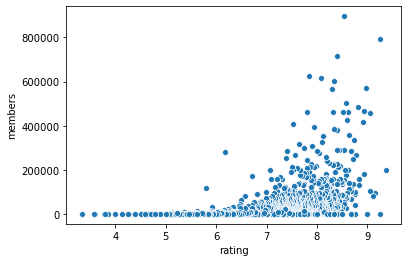

In [18]:
sns.scatterplot(X_mod.rating,X_mod.members)

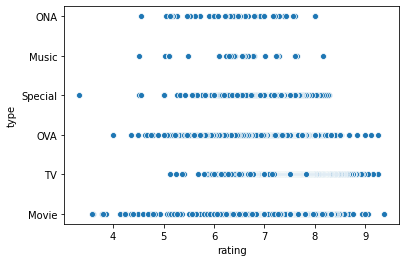

In [19]:
sns.scatterplot(X.rating,X.type)